In [31]:
import pandas as pd
import numpy as np


df1=pd.read_csv('cloud_retail_monthly_exchange_rates.csv')
df=pd.read_csv('cloud_retail_sales_data.csv')
df3=pd.read_excel('CloudRetail - BI Case Study - Key.xlsx')

df

,sales_opportunity_id,hashed_facility_id,hashed_facility_name,country,account_executive,is_active_employee,stage,onboarding_fee,deposit_fee,processing_rate,...,hashed_organization_name,qualifying_date,pitching_date,negotiation_date,commitment_date,closed_won_date,google/ofo_score,account_category,account_subcategory,instagram_followers
0,HI5226,6c601837-403c-425f-a51c-31428ed1a67e,facility_3,Brazil,Bobby Hamilton,True,Negotiation,10.0,1000.0,10.0,...,NaN,2023-07-03 00:00:00.000000 UTC,2023-07-04 00:00:00.000000 UTC,2023-07-04 00:00:00.000000 UTC,NaN,NaN,4.8,CR - Baked Goods,CR - Cakes,64000.0
1,SD4514,76a6ef30-ddb2-4178-8c37-86c0d10db4b3,facility_30,Colombia,Shepard Mills,True,Negotiation,0.0,0.0,0.0,...,NaN,2023-07-03 00:00:00.000000 UTC,2023-07-04 00:00:00.000000 UTC,2023-07-04 00:00:00.000000 UTC,NaN,NaN,4.0,CR - Frozen Desserts,CR - Ice Cream,11100.0
2,WW7107,7aae3115-311b-449f-88f4-0f1612ecfcee,facility_44,Brazil,Armani Murillo,True,Closed Won,175.0,1200.0,10.0,...,organization_64,2023-06-30 00:00:00.000000 UTC,2023-06-23 00:00:00.000000 UTC,2023-06-23 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,4.9,CR - Baked Goods,CR - Cakes,5705.0
3,ZC1725,88aaaf99-a444-4e0f-99f6-267b635faa53,facility_41,Brazil,Armani Murillo,True,Closed Won,175.0,1200.0,10.0,...,organization_64,2023-06-30 00:00:00.000000 UTC,2023-06-23 00:00:00.000000 UTC,2023-06-23 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,4.9,CR - Baked Goods,CR - Cakes,5705.0
4,RG6629,dcc461ae-c80c-46cc-a5dc-4a5a72761510,facility_17,Brazil,Renata Bradshaw,True,Closed Won,0.0,1150.0,5.0,...,organization_21,2023-06-29 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,2023-06-30 00:00:00.000000 UTC,NaN,CR - Frozen Desserts,CR - Gelato,3296.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4613,QV9718,47e2d054-8b82-420c-b1b0-18010f57489c,facility_29,Mexico,Scarlett Rowland,False,Closed Won,0.0,6000.0,5.0,...,organization_425,2020-04-03 00:00:00.000000 UTC,NaN,NaN,2020-04-03 00:00:00.000000 UTC,2020-04-13 00:00:00.000000 UTC,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0
4614,GG6947,864e0a3c-ecba-4305-b3ff-f22edd58c902,facility_34,Mexico,Scarlett Rowland,False,Closed Won,0.0,6000.0,5.0,...,organization_425,2020-03-26 00:00:00.000000 UTC,NaN,NaN,2020-03-26 00:00:00.000000 UTC,2020-04-13 00:00:00.000000 UTC,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0
4615,PM7755,565273fe-0074-421d-b1e1-796d1e4390e1,facility_25,Mexico,Scarlett Rowland,False,Closed Won,0.0,6000.0,5.0,...,organization_425,2020-03-26 00:00:00.000000 UTC,NaN,NaN,2020-03-26 00:00:00.000000 UTC,2020-04-13 00:00:00.000000 UTC,NaN,CR - Frozen Desserts,CR - Ice Cream,539.0
4616,XH8393,565273fe-0074-421d-b1e1-796d1e4390e1,facility_25,Mexico,Dustin Jimenez,False,Closed Won,0.0,10000.0,5.0,...,organization_308,2020-03-10 00:00:00.000000 UTC,2020-03-10 00:00:00.000000 UTC,2020-04-09 00:00:00.000000 UTC,2020-04-14 00:00:00.000000 UTC,2020-04-28 00:00:00.000000 UTC,NaN,CR - Baked Goods,CR - Donuts,9951.0


## Process the Data

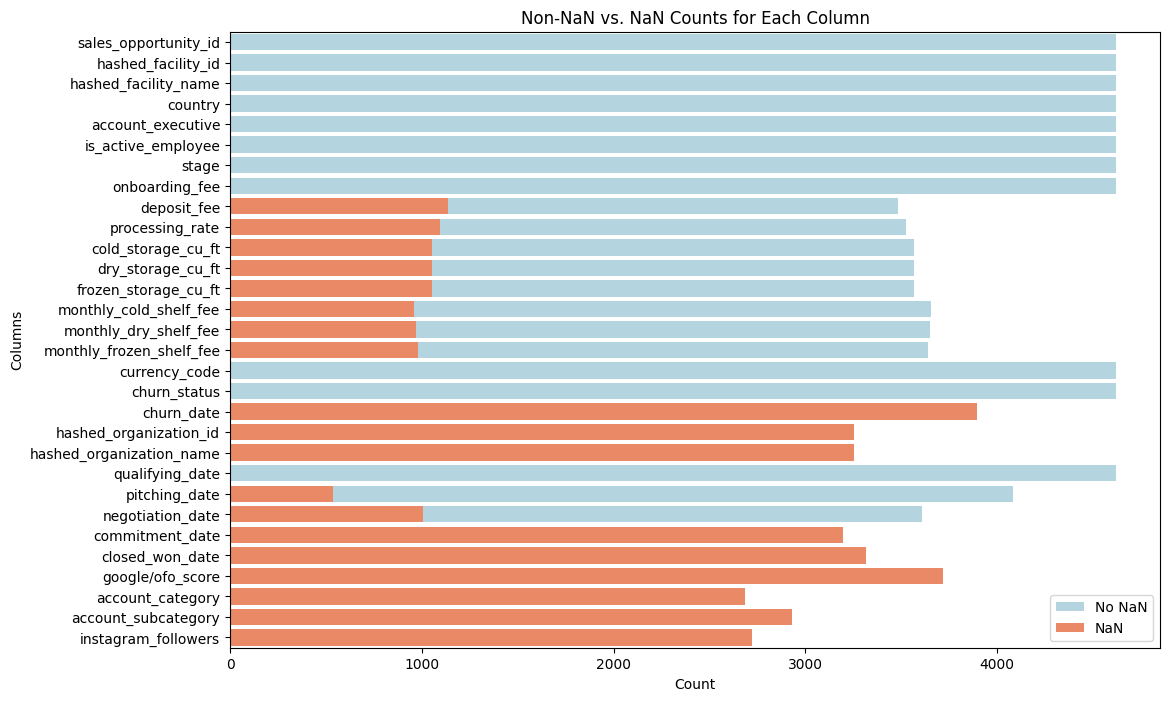

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
nan_counts = df.isnull().sum()
no_nan_counts = len(df) - nan_counts

# Create a bar graph for each column
plt.figure(figsize=(12, 8))
sns.barplot(x=no_nan_counts, y=no_nan_counts.index, color='lightblue', label='No NaN')
sns.barplot(x=nan_counts, y=nan_counts.index, color='coral', label='NaN')
plt.xlabel('Count')
plt.ylabel('Columns')
plt.title('Non-NaN vs. NaN Counts for Each Column')
plt.legend()
plt.show()


In [35]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame containing the sales data
df.dtypes

sales_opportunity_id         object
hashed_facility_id           object
hashed_facility_name         object
country                      object
account_executive            object
is_active_employee             bool
stage                        object
onboarding_fee              float64
deposit_fee                 float64
processing_rate             float64
cold_storage_cu_ft          float64
dry_storage_cu_ft           float64
frozen_storage_cu_ft        float64
monthly_cold_shelf_fee      float64
monthly_dry_shelf_fee       float64
monthly_frozen_shelf_fee    float64
currency_code                object
churn_status                   bool
churn_date                   object
hashed_organization_id       object
hashed_organization_name     object
qualifying_date              object
pitching_date                object
negotiation_date             object
commitment_date              object
closed_won_date              object
google/ofo_score            float64
account_category            

## Exploratory Analisis


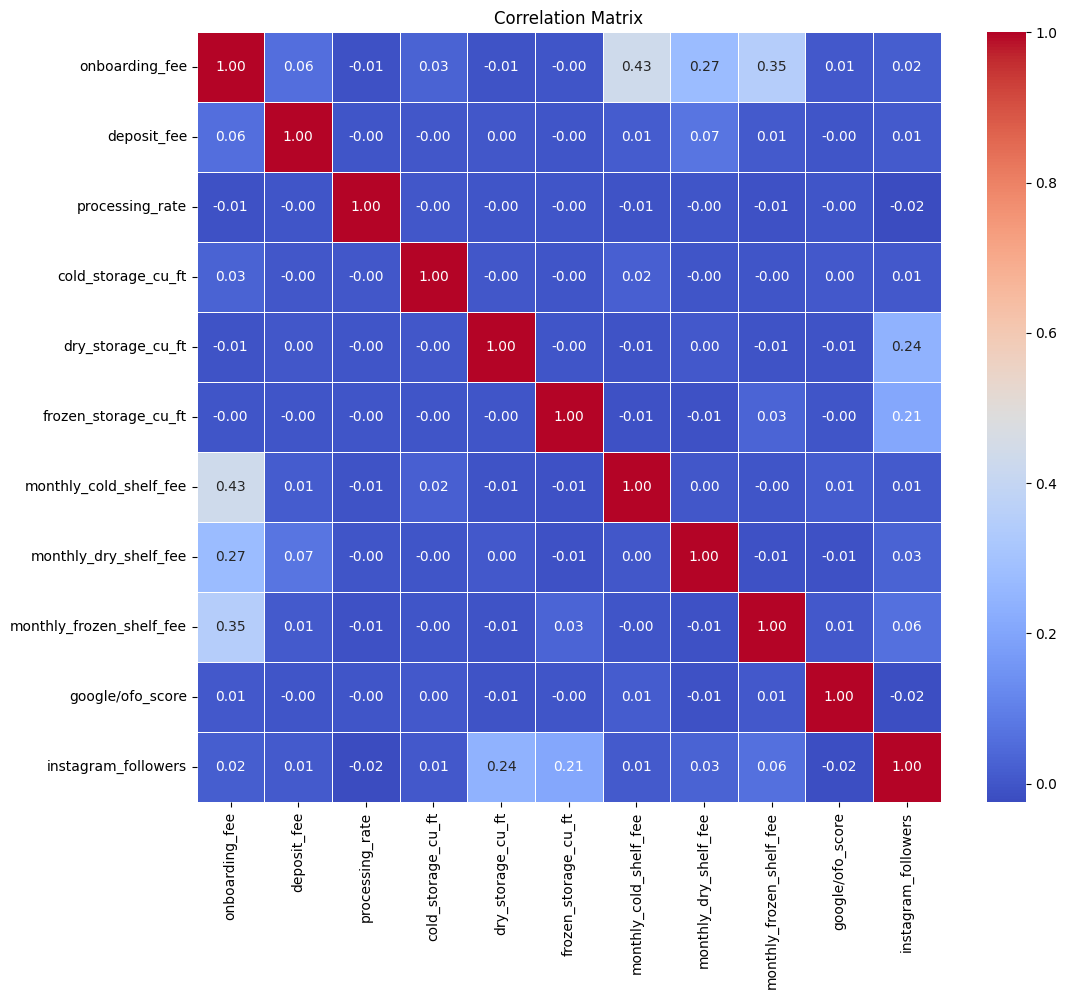

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter columns with 'float64' or 'int' data types
numeric_columns = df.select_dtypes(include=['float64', 'int'])

# Create the correlation matrix
correlation_matrix = numeric_columns.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=.5)
plt.title("Correlation Matrix")
plt.show()



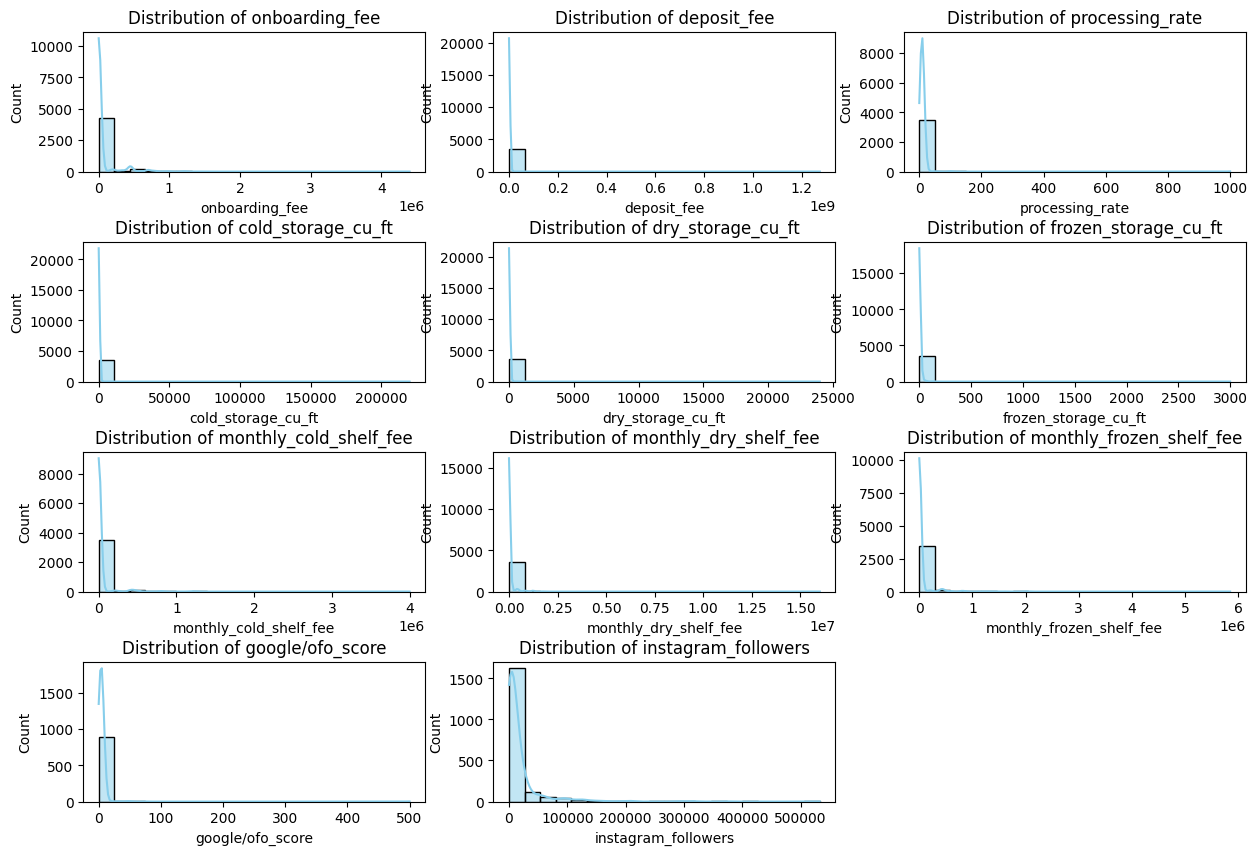

In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Filter columns with 'float64' or 'int' data types
numeric_columns = df.select_dtypes(include=['float64', 'int'])

# Determine the number of rows and columns for subplots
num_columns = len(numeric_columns.columns)
num_rows = (num_columns - 1) // 3 + 1  # Calculate the number of rows needed
num_cols = min(num_columns, 3)  # Maximum of 3 columns per row

# Create subplots to display histograms for each numeric column
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.5)  # Adjust vertical spacing between subplots

for i, column in enumerate(numeric_columns.columns):
    row, col = divmod(i, num_cols)
    ax = axes[row, col]
    sns.histplot(df[column], kde=True, bins=20, color='skyblue', ax=ax)
    ax.set_title(f'Distribution of {column}')
    ax.set_xlabel(column)

# Remove any empty subplots
for i in range(num_columns, num_rows * num_cols):
    fig.delaxes(axes.flatten()[i])

plt.show()



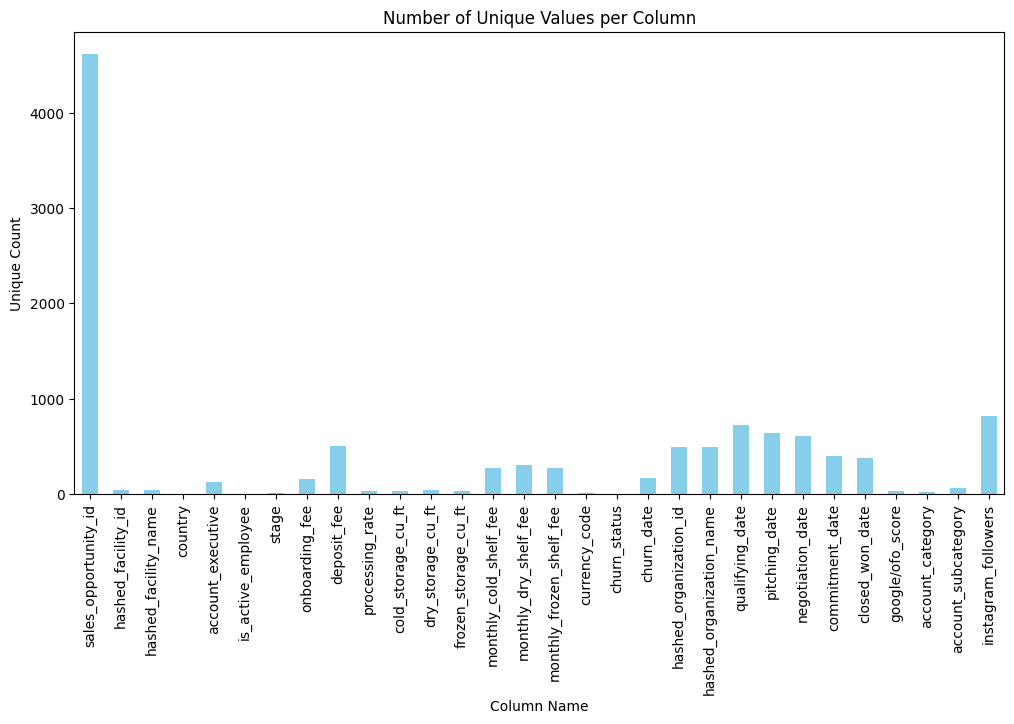

In [42]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
unique_counts = df.nunique()

# Create a bar plot
plt.figure(figsize=(12, 6))
unique_counts.plot(kind='bar', color='skyblue')
plt.title('Number of Unique Values per Column')
plt.xlabel('Column Name')
plt.ylabel('Unique Count')
plt.xticks(rotation=90)
plt.show()


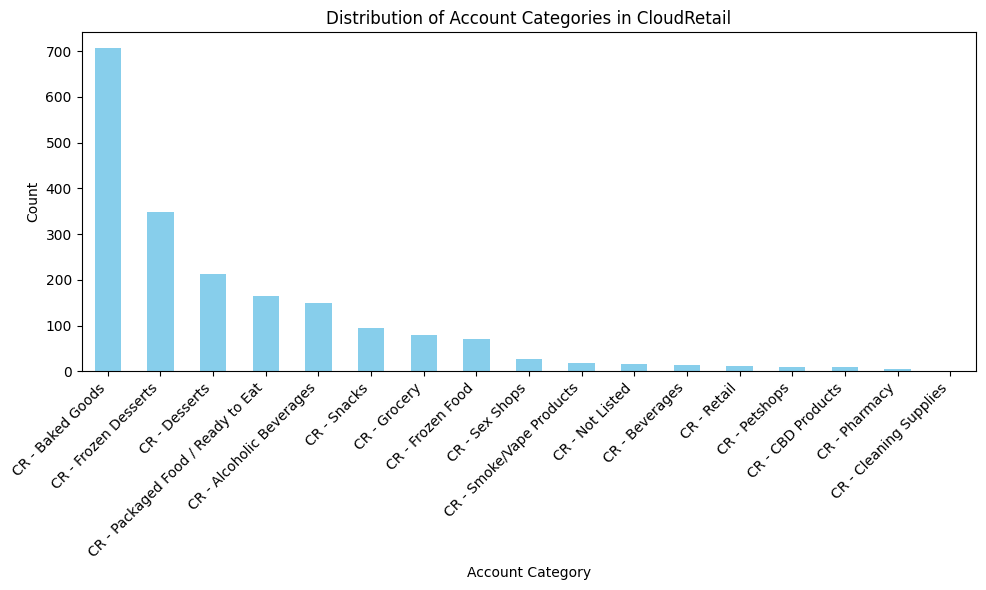

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'account_category' is the column of interest
account_category_counts = df['account_category'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
account_category_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Account Categories in CloudRetail')
plt.xlabel('Account Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


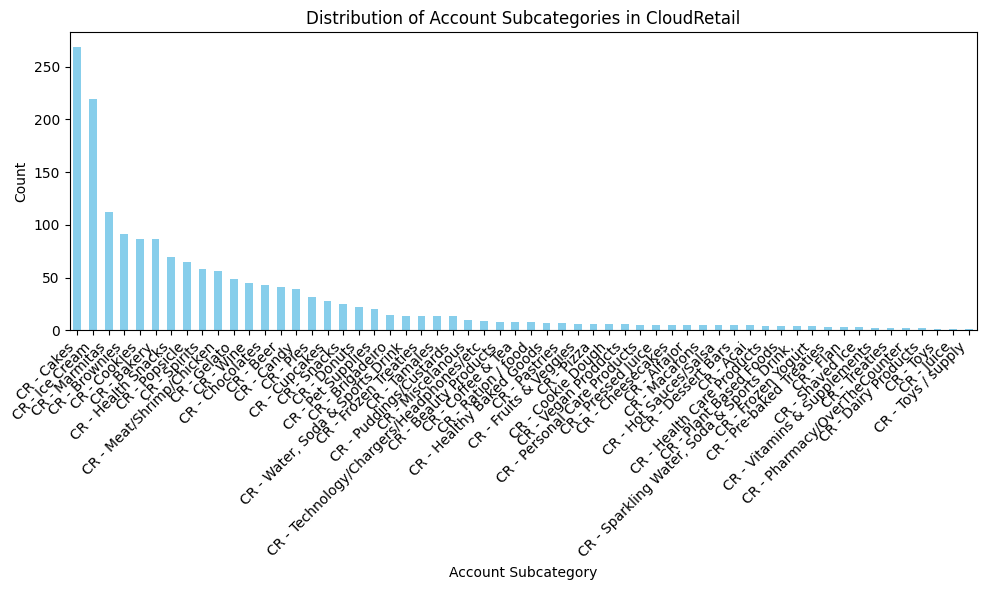

In [44]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'account_subcategory' is the column of interest
account_subcategory_counts = df['account_subcategory'].value_counts()

# Create a bar plot
plt.figure(figsize=(10, 6))
account_subcategory_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Account Subcategories in CloudRetail')
plt.xlabel('Account Subcategory')
plt.ylabel('Count')
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


In [46]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'account_executive' is the column of interest
account_executive_counts = df['account_executive'].value_counts()

account_executive_counts


account_executive
Canaan Buchanan    687
Andrew Marks       476
Bobby Hamilton     357
Shepard Mills      252
Armani Velez       237
                  ... 
Edith Rogers         1
Lennon Guerra        1
Ahmir Snow           1
Paris Gomez          1
Harlee Serrano       1
Name: count, Length: 128, dtype: int64